# [SWCON253] Machine Learning
Instructor: 
- Suyong Bahk (clapd10@khu.ac.kr)
- Yeongwoong Kim (duddnd7575@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P4: PCA를 이용한 차원 축소 (10점)

### 학습목표
- PCA를 이용하는 방법을 익힌다.

### 실습내용
수업시간에 배운 알고리즘을 따라, Numpy를 이용하여 PCA를 수행해 봅시다.

실습은 다음 순서로 진행됩니다.
- 1) 데이터셋 loading
- 2) 모델 학습 **<직접 구현>**
- 3) 모델 시각화
- 4) Discussion

**이번 실습에서 여러분은 `2)` 부분의 코드를 직접 작성합니다.**

### 점수
- 코드 구현: 8점,  `#<your code>`  부분 마다 **2점 부여**
- Discussion: **2점**

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading the Dataset and visualization
랜덤으로 가우시안 분포의 데이터를 생성합니다.

(2, 500)


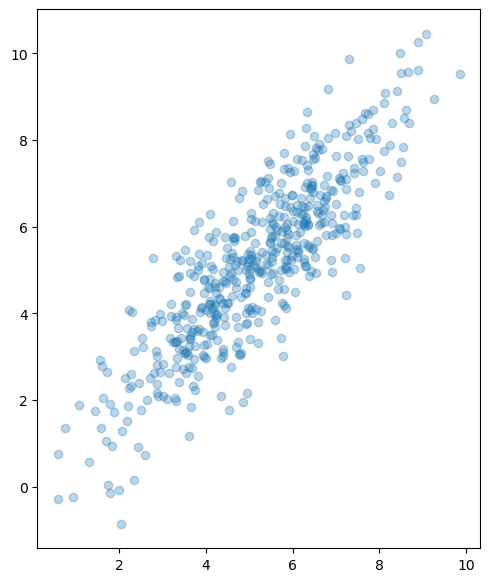

In [5]:
# 랜덤으로 지정한 variance를 갖는 가우시안 분포의 데이터를 생성합니다.
rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[5, 5], cov=cov, size=n_samples).T

print(X.shape)  # 2차원 데이터, 500개의 training samples
# 시각화
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(X[0, :], X[1, :], alpha=0.3, label="samples")

## 2) PCA 학습

여러분은 수업 시간에 다음과 같은 순서로 PCA가 수행됨을 확인하였습니다.  


(전처리) X의 평균 벡터 mu를 구한 후, 평균이 0이 되도록 분포를 이동시킨다. (X')
1. X'의 공분산 행렬 Sigma를 계산한다.
2. Sigma의 고윳값과 고유벡터를 모두 구한다.
3. 고윳값이 큰 순서대로 고유벡터들을 나열한다. (이들을 주성분이라 부름)
4. 고유값이 큰 순서대로 q개의 주성분을 선택하여 행렬 W를 구성한다.
5. PCA 변환 및 역변환을 수행한다.  

(후처리) 다시 평균이 mu가 되도록 분포를 이동시킨다.


이제, 수업시간에 배운 알고리즘을 활용하여 실제 데이터에 대해 PCA를 수행해 보겠습니다.

In [8]:
def pca(X, q=2):
    # 데이터 전처리
    mu = np.mean(X, axis=1)[:, None]
    X_prime = X - mu # <your code>

    # 1. 공분산 행렬 계산
    cov_matrix = np.cov(X_prime, rowvar=True)


    # 2. 고유값 및 고유벡터 계산
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # 3. 고윳값이 큰 순서대로 고유벡터 나열

    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[sorted_index]
    sorted_eigenvalues = eigenvalues[sorted_index]

    # 4. 고유값이 큰 순서대로 q개의 주성분을 선택하여 행렬 W를 구성
    W = sorted_eigenvectors[:, :q]
    print(W.shape)

    # 5. PCA 변환 및 역변환 수행
    Z = np.dot(W.T, X_prime) #=====================
    X_hat = np.dot(W, Z) #====================

    # 데이터 후처리
    X_hat +=  mu #============================


    # X_hat과 X가 동일한지 확인해봅시다.
    print(np.allclose(X, X_hat))
    return Z, X_hat, sorted_eigenvectors, sorted_eigenvalues

**q가 2인 경우에 대해 Z와 X_hat을 시각화해 봅시다.**

In [9]:
Z, X_hat, sorted_eigenvectors, sorted_eigenvalues = pca(X, q=2)

(2, 2)
True


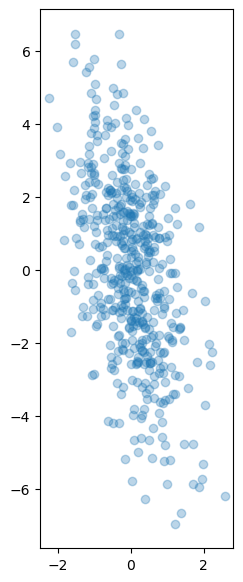

In [10]:
# Z 시각화
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(Z[0, :], Z[1, :], alpha=0.3, label="samples")

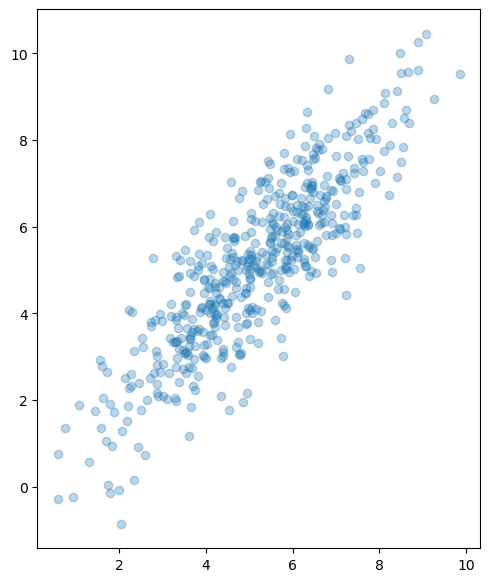

In [11]:
# X_hat 시각화
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(X_hat[0, :], X_hat[1, :], alpha=0.3, label="samples")

**q가 1인 경우에 대해서도 X_hat이 동일하게 복원되는지를 시각화해 봅시다.**  
Note : 동일하게 복원되지 않습니다.

In [12]:
Z, X_hat, sorted_eigenvectors, sorted_eigenvalues = pca(X, q=1)

(2, 1)
False


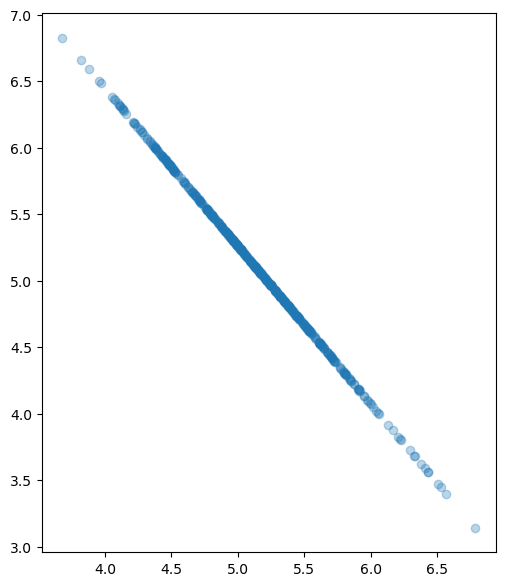

In [14]:
# X_hat 시각화
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(X_hat[0, :], X_hat[1, :], alpha=0.3, label="samples")

**PCA를 통해 주성분, 즉 데이터의 분산이 가장 큰 방향 벡터와 주성분의 분산을 알 수 있습니다.**
- 아래 셀을 실행시켜 이를 확인해봅시다.

In [15]:
print(
    f"Eigenvector 1: {sorted_eigenvectors[0]:}, Eigenvalue: {sorted_eigenvalues[0]:.3f}"
)

print(
    f"Eigenvector 2: {sorted_eigenvectors[1]:}, Eigenvalue: {sorted_eigenvalues[1]:.3f}"
)

Eigenvector 1: [0.64402153 0.76500736], Eigenvalue: 6.212
Eigenvector 2: [-0.76500736  0.64402153], Eigenvalue: 0.459


## 3) 시각화

계산한 eigenvalue와 eigenvector를 X의 공간 위에 시각화해봅시다.

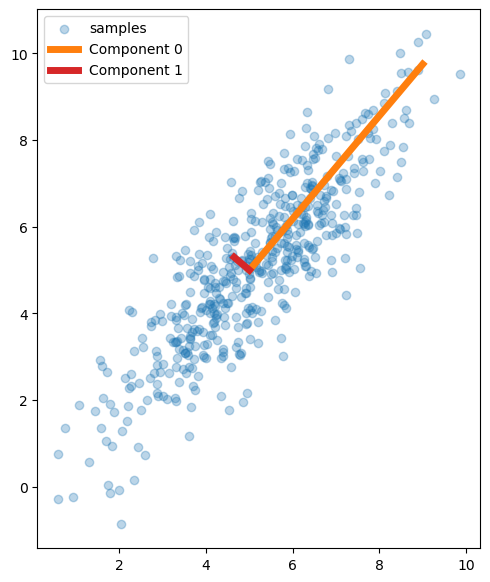

In [16]:
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(X[0, :], X[1, :], alpha=0.3, label="samples")

for i, (comp, var) in enumerate(zip(sorted_eigenvectors, sorted_eigenvalues)):
    # scale component by its variance
    comp = comp * var
    plt.plot(
        [5, comp[0] + 5],
        [5, comp[1] + 5],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i * 2 + 1}",
    )
plt.legend()
plt.show()

## 4) Discussion

**1) PCA 계산 전 mean을 빼는 전처리와, 복원 후 다시 더해주는 후처리가 필요한 이유는 무엇인가요? (1점)**


(여기에 답안 작성)
데이터의 중앙을 원점으로 맞추기 위하여 평균을 빼준다. 공분산행렬이 원점 기준으로 계산되므로 데이터의 방향성을 더 잘 표현할 수 있습니다. 다시 더해주는 이유는 데이터의 원래 분포를 복원하는 이유는 원래 데이터 공간으로 돌아가기 위한 것입니다. 평균을 다시 더해줌으로써 원본 데이터의 중심을 유지하고, 데이터의 분포와 구조를 원래 상태로 정확히 재구성할 수 있습니다. 

**2) PCA를 수행함에 있어 공분산 행렬의 고윳값과 고유벡터를 찾는 이유는 무엇인가요? (1점)**

(여기에 답안 작성)
공분산 행렬의 고윳값과 고유벡터를 찾는 이유는 데이터의 주성분을 알아내기 위해서입니다. 공분산행렬은 데이터의 변동성과 변수들 간의 상관관계를 나타내고 고윳값은 해당 고유벡터 방향으로의 데이터 분산을 나타냅니다. 

큰 고윳값을 가지는 고유벡터일수록 데이터의 변동성이 크고, 중요한 정보를 담고 있습니다.
PCA에서 고윳값과 고유벡터를 활용해 주요한 주성분을 선택하고, 그런 주성분들은 데이터의 분산을 최대한 유지하면서 차원을 축소할 수 있게 해줍니다. 이를 통해 차원 축소와 데이터 압축을 효과적으로 수행할 수 있습니다. 

---